In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from umap import UMAP

from tqdm import tqdm

from nltk.tokenize import word_tokenize

f_path = "/kaggle/input/kmaml223/"

# Data Exploration and Preprocessing

In [3]:
train = pd.read_csv(f_path + 'train.csv')
test = pd.read_csv(f_path + 'test.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,Unnamed: 0,id,comment_text
0,5,0001ea8717f6de06,Thank you for understanding. I think very high...
1,7,000247e83dcc1211,:Dear god this site is horrible.
2,11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
3,13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
4,14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."


In [6]:
print("Number of samples in train dataset:", len(train))
print("Number of samples in test dataset:", len(test))

Number of samples in train dataset: 159571
Number of samples in test dataset: 63978


In [7]:
train['length'] = train['comment_text'].apply(lambda x: len(x))
test['length'] = test['comment_text'].apply(lambda x: len(x))

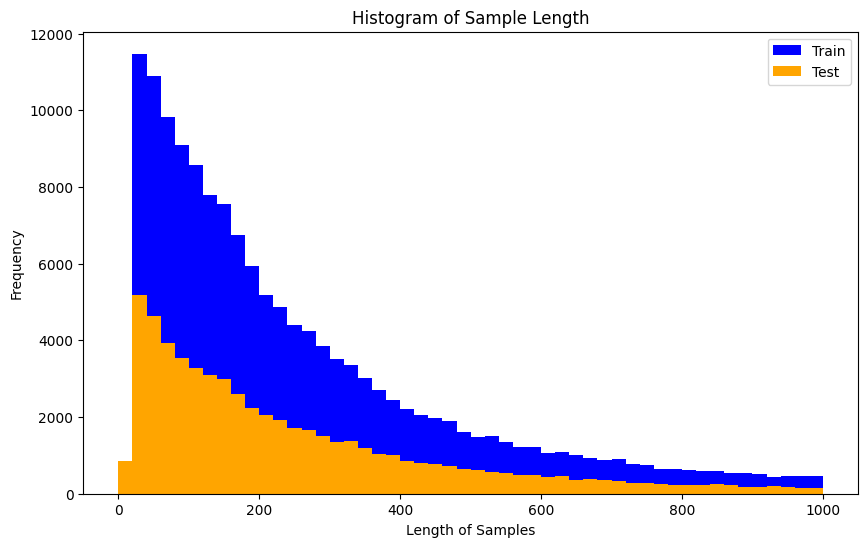

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(train['length'], bins=50, color='blue', label='Train', range=(0, 1000))
plt.hist(test['length'], bins=50, color='orange', label='Test', range=(0, 1000))
plt.title('Histogram of Sample Length')
plt.xlabel('Length of Samples')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
train['word_count'] = train['comment_text'].apply(lambda x: len(x.split()))
test['word_count'] = test['comment_text'].apply(lambda x: len(x.split()))

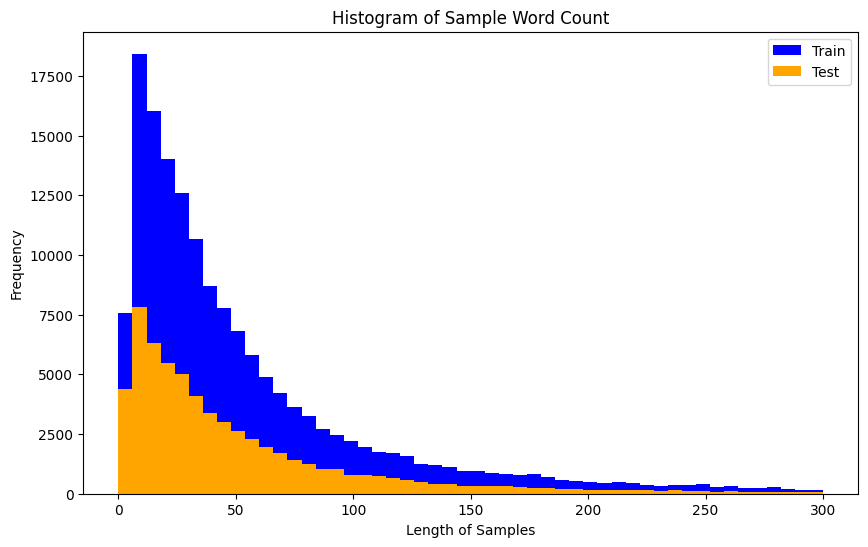

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(train['word_count'], bins=50, color='blue', label='Train', range=(0, 300))
plt.hist(test['word_count'], bins=50, color='orange', label='Test', range=(0, 300))
plt.title('Histogram of Sample Word Count')
plt.xlabel('Length of Samples')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
train['num_symbols'] = train['comment_text'].apply(lambda x: sum(c.isalnum() == False for c in x))
test['num_symbols'] = test['comment_text'].apply(lambda x: sum(c.isalnum() == False for c in x))

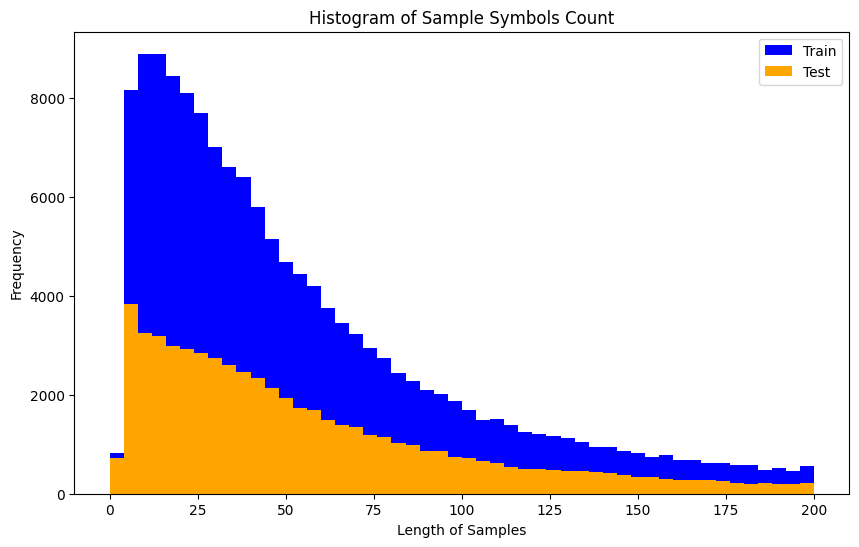

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(train['num_symbols'], bins=50, color='blue', label='Train', range=(0, 200))
plt.hist(test['num_symbols'], bins=50, color='orange', label='Test', range=(0, 200))
plt.title('Histogram of Sample Symbols Count')
plt.xlabel('Length of Samples')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
train['capital_letter_count'] = train['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
test['capital_letter_count'] = test['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))

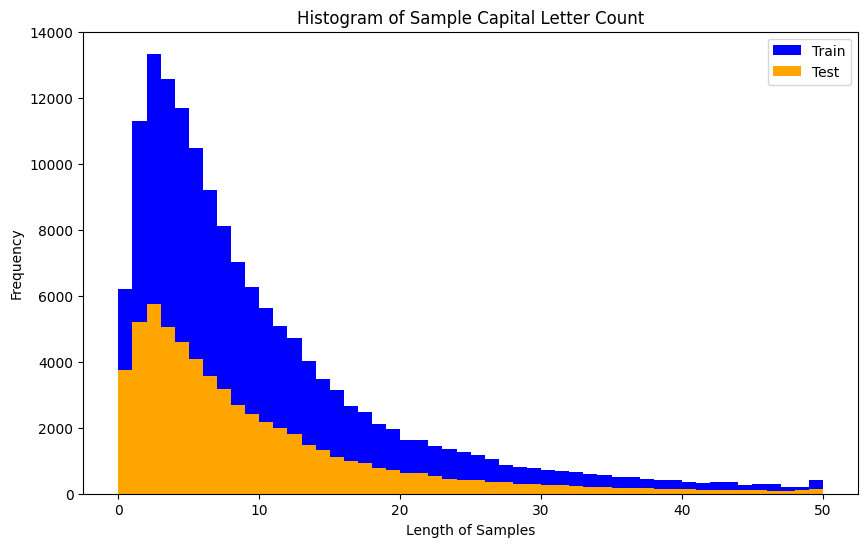

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train['capital_letter_count'], bins=50, color='blue', label='Train', range=(0, 50))
plt.hist(test['capital_letter_count'], bins=50, color='orange', label='Test', range=(0, 50))
plt.title('Histogram of Sample Capital Letter Count')
plt.xlabel('Length of Samples')
plt.ylabel('Frequency')
plt.legend()
plt.show()

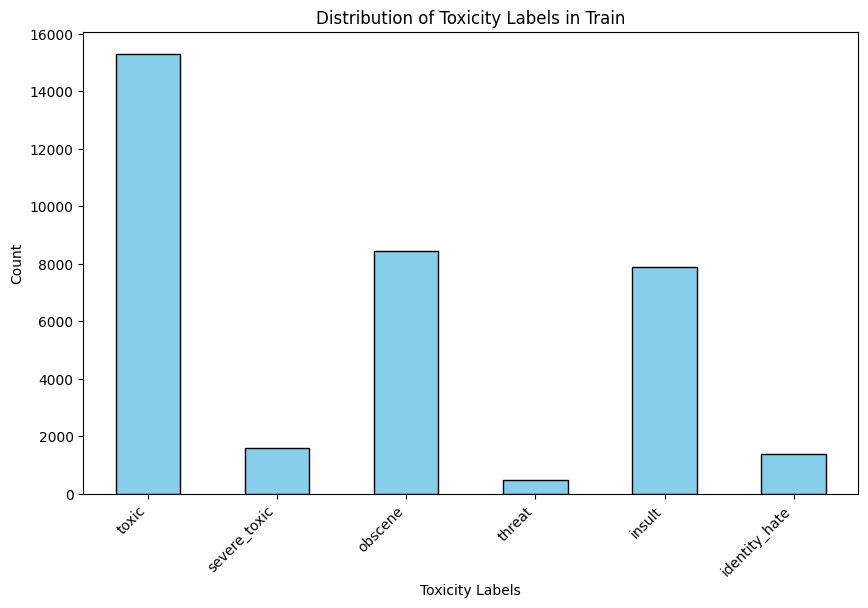

In [21]:
label_counts = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Toxicity Labels in Train')
plt.xlabel('Toxicity Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()